In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')
X=data.iloc[:,2:4]
y=data['Purchased']
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.Gender.replace(['Female','Male'],[0,1],inplace=True)

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2,))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
10/10 [==============================] - 2s 37ms/step - loss: 0.4537 - accuracy: 0.8250 - val_loss: 0.6981 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3317 - accuracy: 0.9062 - val_loss: 0.6983 - val_accuracy: 0.4625
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3066 - accuracy: 0.9062 - val_loss: 0.6650 - val_accuracy: 0.6375
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3572 - accuracy: 0.8844 - val_loss: 0.6628 - val_accuracy: 0.6875
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2976 - accuracy: 0.8906 - val_loss: 0.6729 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3098 - accuracy: 0.9031 - val_loss: 0.6767 - val_accuracy: 0.5750
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2776 - accuracy: 0.8906 - val_loss: 0.6785 - val_accuracy: 0.5750
Epoch 8/100


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 500)               1500      
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 batch_normalization_2 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                        

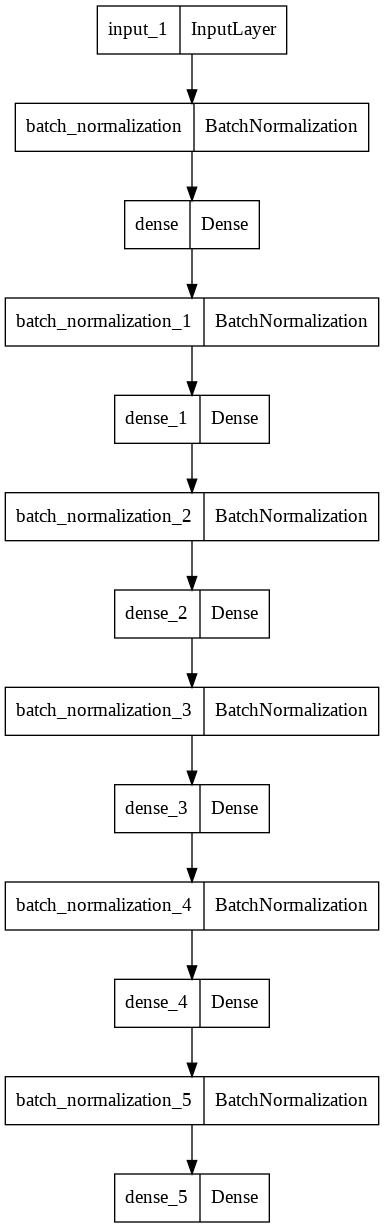

In [ ]:
tf.keras.utils.plot_model(model)